# Flip-Flop Qubit Coupling Mediated By Microwave Cavity
In this research work, we seek to compute the effective coupling between flip-flop qubits via a long microwave cavity. This is motivated by the fact that we want to build large scale quantum computing architectures but are currently restricted by the range at which we can couple spin qubits. Currently, spin coupling is done via the exchange coupling, which requires wavefunction overlap. What we want is to couple spins at distances much larger than that, in the order of hundred of nanometers, which is possible via mocrowave cavity.

In order to do so, we couple the spins to the donor charge qubit. The charge qubits form electric dipoles which can couple to photons in the cavity.

In [99]:
# Import necessary Python libraries
from sympy import *
from sympy.physics.quantum import Ket, Bra, Dagger, HBar, Operator, Commutator, TensorProduct
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product
from sympy.matrices import Matrix, diag,eye, Identity
init_printing(scale = 3)

## Hamiltonian
We will first start with a single flip-flop qubit and a single cavity mode. In addition, we only consider the vacuum and singly occupied photon state. Later on, we will introduce the second flip-flop qubit and then consider more photons in the cavity.

For now, our Hamiltonian is :
$$
\newcommand{ket}[1]{\left|#1\right\rangle}
\newcommand{bra}[1]{\left\langle#1\right|}
H = \hbar \omega_c a^\dagger a + \sum_j E_j \ket{j}\bra{j} + \frac{1}{2}g_c(a+a^\dagger)(1+Z)
$$
where $Z$ is defined as : 
$$
Z = \sum_{jk} z_{jk}\sigma_j\tau_j 
$$
We use a dressed flip-flop qubit so the $\sigma$ *primarily* affect the charge qubit and the $\tau$ primarily affect the spin states. The $a$ ($a^\dagger$) is the annihilation (creation) operator for the photon, $g_c$ is the coupling strength between the flip-flop qubit and the cavity and $\omega_c$ is the cavity energy.

In [148]:
# Initialize all of our symbols
hbar=symbols('\hbar')
wc=symbols('\omega_c')
a=MatrixSymbol('a',2,2)
gc=symbols('g_c')
E0,E1,E2,E3=symbols('E_0 E_1 E_2 E_3')
s0=Matrix([[1,0],[0,1]])
s1=Matrix([[0,1],[1,0]])
s2=Matrix([[0,-I],[I,0]])
s3=Matrix([[1,0],[0,-1]])
z01,z03,z10,z11,z13,z22, z30,z31,z33 = symbols('z_01 z_03 z_10 z_11 z_13 z_22 z_30 z_31 z_33')
a=Matrix([[0,1],[0,0]])

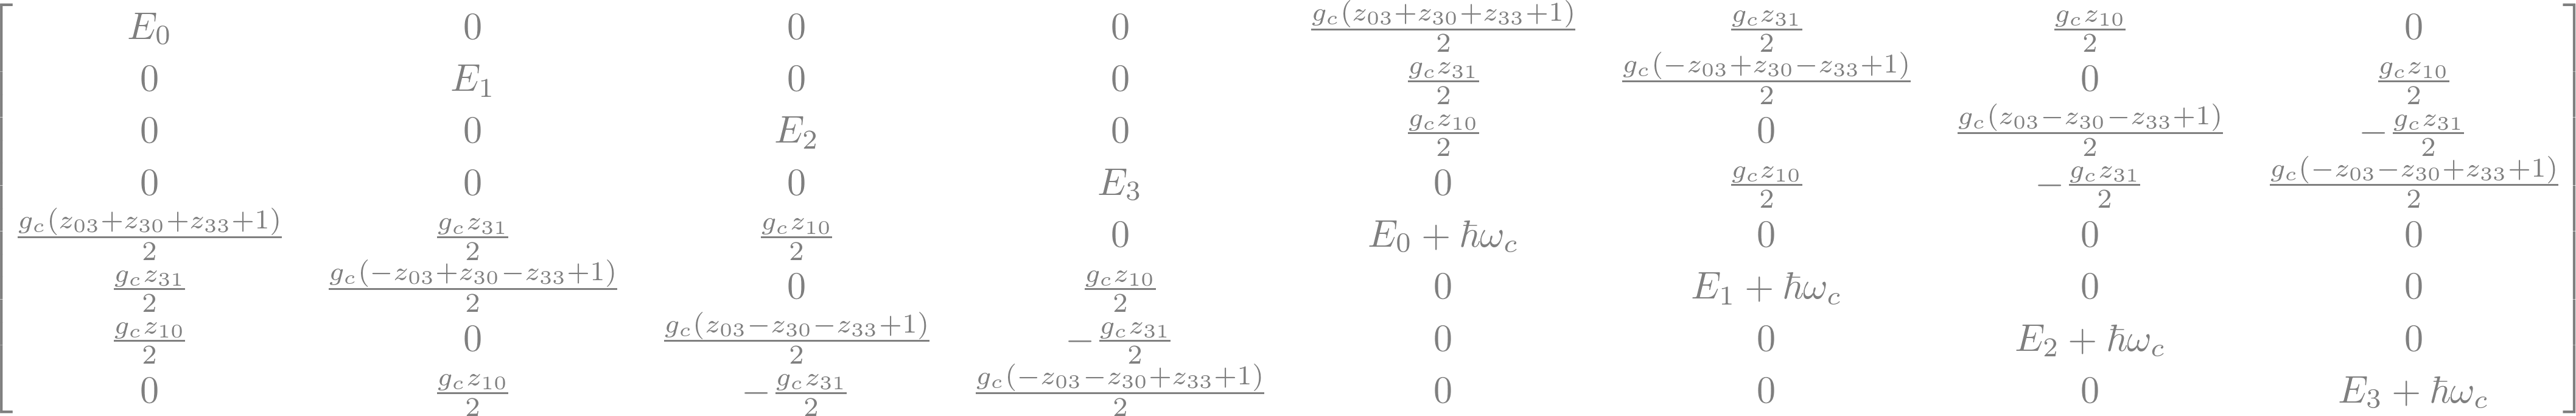

In [154]:
H_ff = diag(E0,E1,E2,E3)
Z=z03*TensorProduct(eye(2),s3) + z10*TensorProduct(s1,eye(2)) + z30*TensorProduct(s3,eye(2)) + z31*TensorProduct(s3,s1) + z33*TensorProduct(s3,s3)
Htotal = hbar*wc*TensorProduct(Dagger(a)*a,eye(4)) + TensorProduct(eye(2),H_ff) + gc*TensorProduct(a+Dagger(a),eye(4)+Z)/2
Htotal